# PreeSee Data Analysis Project 2022
Team Members: Niv Alterman, Snir Zelig, Sol Ben Zeev, Naama Goldbart


# Main Agenda

<strong>Classification</strong> is a task to produce a grouping of data points with the purpose of
predicting the label.

### Import Libraries and modules

In [2]:
# Core libraries
import pandas as pd
import numpy as np

# Algorithm libraries & modules
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

# Visualization libraries & modules (Optional)
import os
os.environ["Path"] += os.pathsep + 'C:\\Users\\MoraNaveh\\anaconda3\\Library\\bin\\graphviz'
import pydotplus
from IPython.display import Image

### Data Preparation

In [3]:
# Define input file
input_file = 'data/presee_data.csv'

# Define class labels
# df_class_names = ['OnTime','Delayed']

In [4]:
# Define a function to create our dataframe

def get_df(file):
    df = pd.read_csv(file)
    return df

# Call the function
df = get_df(input_file)

### Explore The Data

In [6]:
# Define a function to explore the data
def plot_properties (dataframe):
    print('head\n',dataframe.head(5))
    print('columns\n',dataframe.columns)
    print('shape\n', dataframe.shape)
    print('info\n', dataframe.info())
    print('describe\n', dataframe.describe())

# Call the function
plot_properties(df)

head
    patient_id  gender  age  height_cm  weight_kg  bmi  ecg_test_score  \
0           1  Female   41        170         52   18             100   
1           2    Male   26        173         60   20             100   
2           3    Male   38        172         65   22             100   
3           4  Female   39        160         67   26             100   
4           5    Male   33        176         79   26             100   

  ecg_weight  us_test_score us_weight  ...  overall_score smoking  \
0        30%            100       30%  ...             98      NO   
1        30%            100       30%  ...             93     YES   
2        30%            100       30%  ...             93     YES   
3        30%            100       30%  ...             96      NO   
4        30%            100       30%  ...             89      NO   

   heart_disease_hist heart_disease_family_hist  bp_medication diabetes  \
0                  NO                        NO             NO   

In [10]:
# Define a function that counts the number of columns in the dataframe
def get_col_no(dataframe):
    row_no, col_no = dataframe.shape
    return col_no

# Call the function
col_no = get_col_no (df)

# Show the number of columns
col_no

8

In [13]:
# Define a function that shows the features (without the Train column)
def get_feature_names(dataframe):
    names = list(dataframe.columns)
    features_names = names[:-1]
    return features_names

# Call the function
df_features_names = get_feature_names(df)

# Show the features names
df_features_names

['DAY_OF_WEEK',
 'DEP_TIME',
 'Weather',
 'CARRIER_i',
 'DEST_i',
 'ORIGIN_i',
 'Delayed']

In [15]:
# Define a function that shows the predictors (without the target column)
def get_predictors_names(dataframe):
    names = list(dataframe.columns)
    predictors_names = names[:-2]
    return predictors_names

# Call the function
df_predictors_names = get_predictors_names(df)

# Show the predictors names
df_predictors_names

['DAY_OF_WEEK', 'DEP_TIME', 'Weather', 'CARRIER_i', 'DEST_i', 'ORIGIN_i']

### Building The Decision Tree Model

#### Step 1: Saving the data in a multidimensional array

In [16]:
# Define a function that saves the data in an array
def get_nd(dataframe):
    nd = dataframe.values
    return nd

# Call the function
nd_values = get_nd(df)

# Show the values
nd_values

array([[   4, 1455,    0, ...,    1,    0,    0],
       [   4, 1640,    0, ...,    2,    0,    1],
       [   4, 1245,    0, ...,    3,    0,    0],
       ...,
       [   6, 1558,    0, ...,    2,    0,    1],
       [   6, 1403,    0, ...,    2,    0,    0],
       [   6, 1736,    0, ...,    2,    0,    1]], dtype=int64)

#### Step 2: Split array into train and test

In [29]:
# Define a function that split the array into train and test data
def get_nd_train_test(ndarray, train_index):
    nd_train = ndarray[ndarray[:,col_no-1] == 1]
    nd_test = ndarray[ndarray[:,col_no-1] == 0]
    return nd_train, nd_test

# Call the function
nd_train_data, nd_test_data = get_nd_train_test (nd_values, col_no-1)

# Show the train data
nd_train_data

array([[   4, 1455,    0, ...,    1,    0,    0],
       [   4, 1245,    0, ...,    3,    0,    0],
       [   4, 1035,    0, ...,    3,    0,    0],
       ...,
       [   6, 2111,    0, ...,    3,    0,    0],
       [   6,  650,    0, ...,    3,    0,    0],
       [   6, 1403,    0, ...,    2,    0,    0]], dtype=int64)

#### Step 3: Predictors and label separations<br><br>(X - includes the predictors columns; Y - includes the label (target) column)

In [30]:
# Define a function that separates the predictors columns from the label (target) column
def get_XY(ndarray):
    X = ndarray[:,:-2]
    Y = ndarray[:,-2]
    return X, Y

# Call the function
x_train, y_train = get_XY (nd_train_data)
x_test, y_test = get_XY (nd_test_data)

#### Step 4: Build model with training data

In [31]:
# Define a function that will create a decision tree that classifies flights (characterized by the predictors) with similar label (target) (Delayed / OnTime)
def get_clf(X,Y):
    clf = DecisionTreeClassifier(criterion="gini", min_impurity_decrease = 0.01)
    clf.fit(X, Y)
    return clf

# Call the function
dt_clf = get_clf(x_train,y_train)


#### Step 5: Make predictions for testing data

In [34]:
# Define a function that takes the trained model and test it on unseen data (i.e., test data)
def get_pred(classifier, X):
    y_pred = classifier.predict(X)
    return y_pred

# Call the function
dt_y_pred = get_pred(dt_clf, x_test)

### Evaluate The Model

#### Step 6: Evaluate the model using the Accuracy Measure<br><br>Accuracy = Frequency of cases when the model is correct

In [36]:
# Define a function that calculates the accuracy
def get_accuracy(test, pred):
    accuracy = metrics.accuracy_score(test,pred)
    return accuracy

# Call the function
dt_clf_accuracy = get_accuracy(y_test,dt_y_pred)

# Show the Accuracy value
dt_clf_accuracy

0.8095238095238095

### Visualize the Model (Optional)

In [39]:
# Define a function that transform the model results from numerical values into a graph
def get_graph (classifier, predictors_names):
    dot_data = tree.export_graphviz(classifier, out_file=None,
                                    feature_names=predictors_names,
                                    class_names=df_class_names)
    graph = pydotplus.graph_from_dot_data(dot_data)
    return graph

# Call the function
dt_graph = get_graph(dt_clf,df_predictors_names)

In [41]:
# Define a function that saves the graph into PDF and JPEG files
def save_graph(graph):
    graph.write_pdf('DT flights.pdf')
    graph.write_jpg('DT flights.jpg')

# Call the function
save_graph(dt_graph)

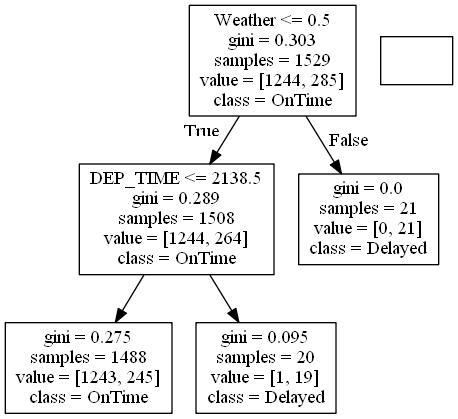

In [43]:
# Define a function that creates an image of the decision tree graph
def get_image(graph):
    image=Image(graph.create_png())
    return image

# Call the function
graph_image = get_image(dt_graph)

# Show the image
graph_image